# 数据科学的步骤

**问题定义**：与项目相关的利益相关者合作，明确要解决的具体业务问题并确定项目成功的评估标准，如提升的准确度或用户参与度。

**数据收集**：确定可用的数据源，如内部数据库和外部公共数据集，并使用API调用、数据爬取或其他方法收集数据。数据清洗和预处理：处理缺失数据，选择填充缺失值或删除缺失记录，识别并处理数据中的异常值，调整或删除，并确保数据类型正确，适合进行分析和建模。

**数据探索性分析（EDA）**：运用描述性统计分析来总结数据特征，并通过散点图、箱线图等可视化方法展示数据分布和变量间关系。

**特征工程**：创造新特征，如从日期数据提取出“周几”或“月份”，并通过相关性分析等方法选择对模型最有影响的特征。

**建立模型**：根据问题类型选择合适的模型，如决策树或神经网络，并将数据分为训练集和测试集，用训练集来训练模型。

**模型评估**：使用如K折交叉验证等方法评估模型的稳健性，并采用准确率、AUC、均方误差等指标评价模型性能。

**模型优化**：进行超参数调整，如网格搜索或随机搜索，并尝试模型融合，如集成学习或堆叠以提高模型性能。预测与部署：将模型应用于新数据，进行实际预测，并将模型通过Web API等方式部署至生产环境。

**监控与维护**：定期监测模型性能，确保预测准确性，并根据新数据和业务需求对模型进行迭代更新。这些步骤帮助团队系统地解决业务问题，并通过数据驱动的方式提供洞见和预测，帮助企业做出更明智的决策。

# 问题定义与数据收集

在当前的高等教育环境中，学生辍学率的问题一直是教育政策制定者和高等教育机构关注的焦点。高辍学率不仅影响学生个人的未来发展，还可能对社会经济结构产生长远的影响，包括劳动力市场的质量和国家的经济竞争力。因此，识别潜在的辍学学生，并采取早期干预措施，是提高教育成效和学生满意度的关键。

本次 Kaggle Playground Series S4E6 比赛提供了一个独特的机会，通过数据科学来应对这一挑战。比赛中使用的数据集是由深度学习模型生成的，该模型在真实世界的教育数据上进行训练，模拟了学生在入学时的学业路径、人口统计和社会经济背景，基于UCI提供的Predict Students' Dropout and Academic Success中的数据集。这些生成的数据集在特征分布上与原始数据集接近，但不完全相同，为数据科学家提供了一个理想的平台，来探索和测试不同的机器学习方法和模型，预测学生的三种可能的学业成果：辍学、继续入学和毕业。

这项挑战的具体问题定义是：如何利用通过深度学习技术生成的模拟数据，精准预测学生的学业成果，同时探索原始数据集的特征和信息是否能够提升预测模型的性能。通过这样的分析和模型建立，我们不仅能够在比赛中测试和改进预测算法，还能够为实际的教育干预策略提供数据驱动的见解。

此外，将比赛的结果与现实世界的教育数据相结合，可能帮助教育机构开发出更有效的学生支持系统，这些系统能够根据学生的特定风险因素定制个性化的干预计划，最终减少辍学率，提高学生在学业和职业道路上的成功率。这种方法的成功实施，可能会改变高等教育的面貌，提高其整体质量和效率。

# 数据探索性分析（EDA）

首先导入数据集：

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# 设置文件路径
file_path = '../data/playground-series-s4e6/train.csv'

# 导入CSV文件
train_data = pd.read_csv(file_path)

首先查看数据集的大小：

In [8]:
train_data.shape  # 数据集的形状

(76518, 38)

数据集一共有76518个实例，并且一共有38个变量。

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

这个数据集是一个关于学生信息的综合性数据库，包含了76,518条记录和38个特征列。数据集的结构非常完整，没有缺失值，为后续的分析和建模提供了良好的基础。

特征的数据类型主要分为三类：整数型(int64)、浮点型(float64)和对象型(object)。其中，整数型特征占据了大多数，有30列；浮点型特征有7列；而对象型特征只有1列，即目标变量。这种数据类型的分布反映了数据集中包含了大量的分类和数值信息。
这些特征涵盖了广泛的信息类别。个人信息包括婚姻状况、性别、年龄和国籍等。教育背景包含了之前的学历、入学成绩和是否有特殊教育需求等。家庭背景记录了父母的学历和职业。学习情况则详细记录了每个学期的课程单元信息，如已注册、评估和通过的课程数量。此外，还包括了一些经济因素，如是否有奖学金、学费是否及时缴纳和债务情况等。

值得注意的是，数据集还包含了一些宏观经济指标，如失业率、通货膨胀率和GDP，这些都是浮点型数据。这暗示了研究可能会考虑社会经济因素对学生情况的影响。

目标变量是对象类型，这可能意味着它是一个分类变量，可能用于预测某种教育相关的结果。在进行建模时，可能需要对这个变量进行编码处理。

对于数据预处理，研究者需要注意一些整数型变量（如婚姻状况、性别等）实际上可能是分类变量，可能需要进行适当的编码处理。同时，对于成绩信息和经济指标等连续型变量，可能需要进行标准化处理。这些步骤将有助于提高后续分析和建模的效果。

这是原始的数据集中的变量描述：

| 变量名称 | 角色 | 类型 | 描述 | 缺失值 |
| --- | --- | --- | --- | --- |
| 婚姻状况 | 特征 | 整数 | 1 - 单身 2 - 已婚 3 - 丧偶 4 - 离婚 5 - 事实婚姻 6 - 法定分居 | 无 |
| 报名方式 | 特征 | 整数 | 报名阶段的不同类别 | 无 |
| 申请顺序 | 特征 | 整数 | 申请顺序（0 - 第一选择; 至 9 - 最后选择） | 无 |
| 课程 | 特征 | 整数 | 课程编号和名称 | 无 |
| 日间/夜间学习 | 特征 | 整数 | 1 - 日间 0 - 夜间 | 无 |
| 先前资格 | 特征 | 整数 | 教育水平 | 无 |
| 先前资格（成绩） | 特征 | 连续 | 先前资格的成绩（0到200） | 无 |
| 国籍 | 特征 | 整数 | 国籍分类 | 无 |
| 母亲的学历 | 特征 | 整数 | 教育水平 | 无 |
| 父亲的学历 | 特征 | 整数 | 教育水平 | 无 |
| 母亲的职业 | 特征 | 整数 | 职业分类 | 无 |
| 父亲的职业 | 特征 | 整数 | 职业分类 | 无 |
| 录取成绩 | 特征 | 连续 | 录取时的成绩（0到200） | 无 |
| 外来学生 | 特征 | 整数 | 1 - 是 0 - 否 | 无 |
| 是否有教育特殊需求 | 特征 | 整数 | 1 - 是 0 - 否 | 无 |
| 是否拖欠学费 | 特征 | 整数 | 1 - 是 0 - 否 | 无 |
| 学费是否到期 | 特征 | 整数 | 1 - 是 0 - 否 | 无 |
| 性别 | 特征 | 整数 | 1 - 男 0 - 女 | 无 |
| 是否为奖学金持有者 | 特征 | 整数 | 1 - 是 0 - 否 | 无 |
| 入学时年龄 | 特征 | 整数 | 学生入学时的年龄 | 无 |
| 国际学生 | 特征 | 整数 | 1 - 是 0 - 否 | 无 |
| 第一学期课程单元（学分） | 特征 | 整数 | 第一学期获得学分的课程单元数量 | 无 |
| 第一学期课程单元（注册） | 特征 | 整数 | 第一学期注册的课程单元数量 | 无 |
| 第一学期课程单元（考核次数） | 特征 | 整数 | 第一学期的考核次数 | 无 |
| 第一学期课程单元（通过） | 特征 | 整数 | 第一学期通过的课程单元数量 | 无 |
| 第一学期课程单元（成绩） | 特征 | 整数 | 第一学期的平均成绩（0到20） | 无 |
| 第一学期课程单元（未考核） | 特征 | 整数 | 第一学期未进行考核的课程单元数量 | 无 |
| 第二学期课程单元（学分） | 特征 | 整数 | 第二学期获得学分的课程单元数量 | 无 |
| 第二学期课程单元（注册） | 特征 | 整数 | 第二学期注册的课程单元数量 | 无 |
| 第二学期课程单元（考核次数） | 特征 | 整数 | 第二学期的考核次数 | 无 |
| 第二学期课程单元（通过） | 特征 | 整数 | 第二学期通过的课程单元数量 | 无 |
| 第二学期课程单元（成绩） | 特征 | 整数 | 第二学期的平均成绩（0到20） | 无 |
| 第二学期课程单元（未考核） | 特征 | 整数 | 第二学期未进行考核的课程单元数量 | 无 |
| 失业率 | 特征 | 连续 | 失业率（%） | 无 |
| 通货膨胀率 | 特征 | 连续 | 通货膨胀率（%） | 无 |
| GDP | 特征 | 连续 | 国内生产总值 | 无 |
| 目标 | 目标 | 分类 | 问题定义为课程正常持续时间结束时的三类分类任务（辍学、入学、毕业） | 无 |

以下变量应该被视为分类变量，因为它们代表了不同的类别、类型或分组，而非连续的数值：

- 婚姻状况 - 包含不同婚姻状态的类别（如单身、已婚、丧偶等）。
- 报名方式 - 表示不同的报名类别，如普通入学、特殊规定入学等。
- 课程 - 代表不同的课程编号和名称。
- 日间/夜间学习 - 表示学生是在日间还是夜间上课。
- 先前资格 - 描述学生之前的教育水平，如中学教育、学士学位等。
- 国籍 - 表示学生的国籍。
- 母亲的学历 - 描述母亲的教育水平。
- 父亲的学历 - 描述父亲的教育水平。
- 母亲的职业 - 描述母亲的职业类别。
- 父亲的职业 - 描述父亲的职业类别。
- 外来学生 - 表示学生是否为外来学生。
- 是否有教育特殊需求 - 表示学生是否有特殊教育需求。
- 是否拖欠学费 - 表示学生是否拖欠学费。
- 学费是否到期 - 表示学费是否已经支付。
- 性别 - 描述学生的性别。
- 是否为奖学金持有者 - 表示学生是否持有奖学金。
- 国际学生 - 表示学生是否为国际学生。
- 目标 - 分类目标变量，描述学生在课程结束时的状态（辍学、继续入学、毕业）。

这些变量是分类变量，因为它们通过代表不同类别或类型的固定数值来描述特定属性。

In [14]:
# 将这些列转换为分类变量
categorical_columns = [
    'Marital status', 'Application mode', 'Course', 'Daytime/evening attendance',
    'Previous qualification', 'Nacionality', 'Mother\'s qualification',
    'Father\'s qualification', 'Mother\'s occupation', 'Father\'s occupation',
    'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date',
    'Gender', 'Scholarship holder', 'International', 'Target'
]

for column in categorical_columns:
    train_data[column] = train_data[column].astype('category')

# 检查数据类型更改后的信息
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   id                                              76518 non-null  int64   
 1   Marital status                                  76518 non-null  category
 2   Application mode                                76518 non-null  category
 3   Application order                               76518 non-null  int64   
 4   Course                                          76518 non-null  category
 5   Daytime/evening attendance                      76518 non-null  category
 6   Previous qualification                          76518 non-null  category
 7   Previous qualification (grade)                  76518 non-null  float64 
 8   Nacionality                                     76518 non-null  category
 9   Mother's qualification      

在Pandas中，将数据列转换为`category`数据类型而不是保留为`object`类型有几个重要的优点，特别是在处理具有重复类别值的数据时：

1. **内存效率**：`category`数据类型通常会比`object`类型使用更少的内存。`object`类型通常用于存储字符串和其他Python对象，包括混合数据类型。每个`object`类型的值都被存储为一个Python对象。相比之下，`category`类型在内部通过整数来表示类别级别，这些整数映射到实际的类别标签。因此，如果一个列中有数千个重复的类别值，使用`category`类型会更有效，因为只需要存储数个唯一标签及其整数映射，而不是重复存储每个标签。

2. **处理速度**：操作`category`类型通常比操作`object`类型更快，因为它们在内部使用整数编码，而不是字符串。这使得某些操作，如排序或任何基于类别的分组操作，更加高效。

3. **方便的数据分析**：`category`数据类型支持顺序分类和逻辑顺序（如果有的话），这在数据分析和统计建模中非常有用。例如，可以定义类别的特定顺序（如`['poor', 'good', 'excellent']`），并在分析中保留这个顺序。

4. **功能性**：`category`数据类型在某些特定的Pandas操作中提供更多功能，如能够使用`.cat`访问器进行分类特定的操作，包括重新分类、设置类别顺序等。

总之，如果列中的数据是有限的、重复的且表示类别信息（如性别、国家、等级等），那么使用`category`类型不仅可以提高内存和计算效率，还可以利用Pandas为分类数据提供的额外功能。

接着将数值型变量和分类变量单独提取出来进行进一步的探索：

In [16]:
# 不同类型的变量
# 提取所有数值变量（int64和float64类型），排除索引列
numeric_variables = train_data.select_dtypes(include=['int64', 'float64']).drop(columns=['id'])

# 提取所有分类变量（category类型），排除'Target'列
categorical_variables = train_data.select_dtypes(include=['category']).drop(columns=['Target'], errors='ignore')

# 检查提取结果
print("Numeric variables:")
print(numeric_variables.columns)
print("\nCategorical variables:")
print(categorical_variables.columns)

Numeric variables:
Index(['Application order', 'Previous qualification (grade)',
       'Admission grade', 'Age at enrollment',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP'],
      dtype='object')

Categorical variables:
Index(['Marital status', 'Application mode', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
      

In [21]:
numeric_variables.describe()

,Application order,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.00000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000
mean,1.644410,132.378766,125.363971,22.278653,0.188871,5.891516,7.352362,4.178520,9.995862,0.05796,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921
std,1.229645,10.995328,12.562328,6.889241,1.175296,1.671776,3.508292,2.687995,5.264224,0.40849,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382
min,0.000000,95.000000,95.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,125.000000,118.000000,18.000000,0.000000,5.000000,6.000000,2.000000,10.666667,0.00000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,133.100000,124.600000,19.000000,0.000000,6.000000,7.000000,5.000000,12.166667,0.00000,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000
75%,2.000000,140.000000,132.000000,23.000000,0.000000,6.000000,9.000000,6.000000,13.314286,0.00000,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000
max,9.000000,190.000000,190.000000,70.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.00000,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000


这个数据集的统计信息：

1. Application order（申请顺序）:
   - 平均值为1.64，中位数为1，表明大多数学生将这个学校作为第一或第二选择
   - 标准差为1.23，相对于平均值较大，说明申请顺序有一定的分散性
   - 75%的学生申请顺序在2或以下，进一步证实了这个学校是大多数学生的优先选择

2. Previous qualification (grade)（先前资格成绩）:
   - 平均值为132.38，中位数为133.1，非常接近，表明分布可能比较对称
   - 最小值95，最大值190，范围较大
   - 标准差为10.99，相对于平均值不是很大，说明成绩分布相对集中

3. Admission grade（入学成绩）:
   - 平均值125.36，略低于先前资格成绩，可能表明入学考试难度较大
   - 标准差12.56，比先前资格成绩的标准差稍大，说明入学成绩的分散程度略高

4. Age at enrollment（入学年龄）:
   - 平均年龄22.28岁，中位数19岁，表明存在右偏分布，有一些年龄较大的学生拉高了平均值
   - 最小值17岁，最大值70岁，范围非常大
   - 75%的学生在23岁或以下，说明大多数是传统年龄段的学生

5. Curricular units（课程单元）- 第一学期:
   - 平均注册（enrolled）5.89个单元，评估（evaluations）7.35次，通过（approved）4.18个
   - 平均成绩（grade）为10.00（假设满分为20），表现一般
   - 未评估（without evaluations）的平均值很低（0.06），说明大多数课程都有进行评估

6. Curricular units（课程单元）- 第二学期:
   - 数据与第一学期相似，但通过率略有下降（从4.18降至4.01）
   - 成绩也略有下降（从10.00降至9.63）

7. 经济指标:
   - 失业率（Unemployment rate）平均为11.52%，最低7.6%，最高16.2%，波动较大
   - 通货膨胀率（Inflation rate）平均为1.23%，最低-0.8%（通缩），最高3.7%，同样波动较大

8. 整体观察:
   - 数据集包含76,518条记录，样本量很大，有利于进行统计分析
   - 大多数变量都显示出一定程度的变异性，这对于建立预测模型可能是有利的
   - 学生的学术表现（从入学成绩到课程成绩）呈现出一定的下降趋势，可能需要进一步研究原因
   - 经济指标的波动可能会影响学生的学习情况，值得进行相关性分析

9. 潜在的研究方向:
   - 探索入学年龄与学术表现的关系
   - 分析经济指标与学生表现之间的可能联系
   - 研究第一学期和第二学期表现的变化及其影响因素
   - 调查申请顺序是否与学生后续表现有关

使用箱型图来进行可视化：

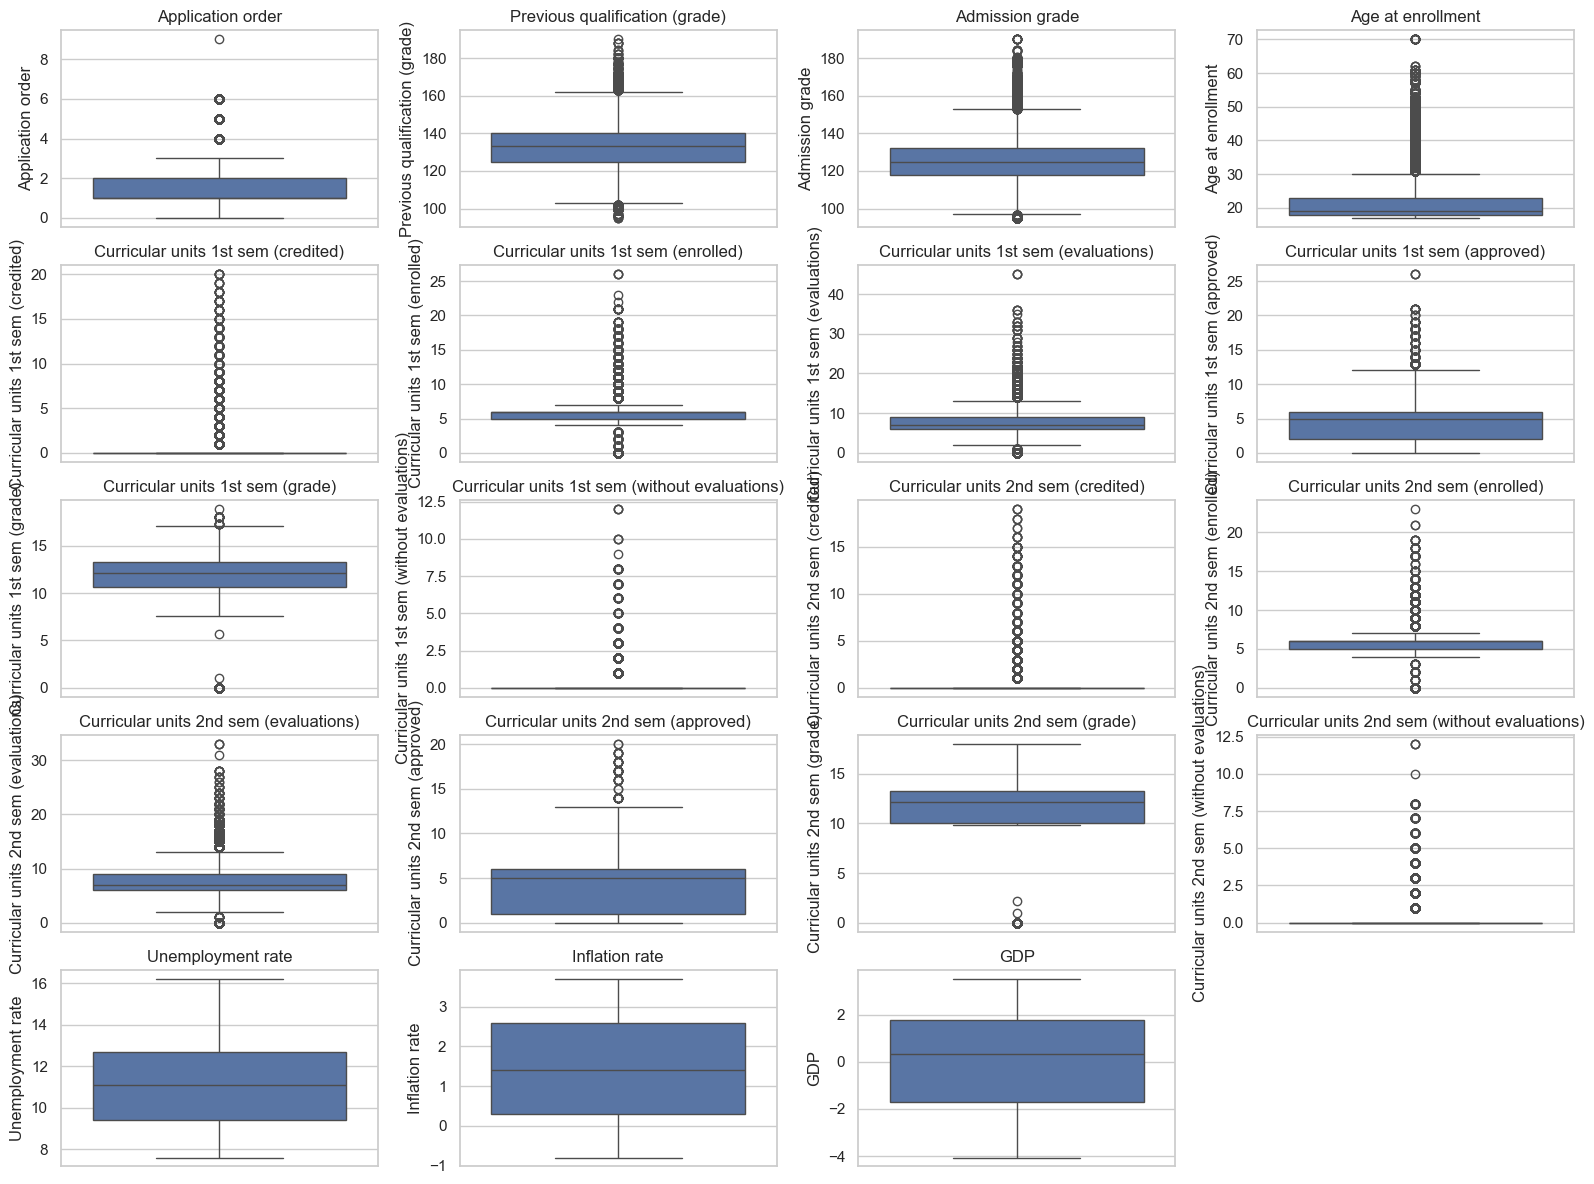

In [23]:
# 设置图形的风格
sns.set(style="whitegrid")

# 设置一个较大的图形尺寸，以容纳所有的箱型图
plt.figure(figsize=(16, 12))

# 对numeric_variables中的每一个数值变量绘制箱型图
for i, column in enumerate(numeric_variables.columns, 1):
    plt.subplot(5, 4, i)  # 假设总共有不超过20个数值变量
    sns.boxplot(y=numeric_variables[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

从可视化的结果可以发现：

- Application order的大多数数据集中在较低的值，存在着非常少的异常值
- Previous qualification (grade)的分布较为广阔，中位数接近100，存在一些较高的异常值，表明有些学生的先前成绩非常优秀
- Admission grade - 入学成绩的分布与先前资格成绩类似，也显示出广泛的分布和较高的异常值。
- Age at enrollment - 入学年龄的分布相对集中，主要集中在20岁左右，Upper Bound在30岁，存在着不少的高于了30的异常值，最大的学生年龄可以到达70岁
- Curricular units 1st sem (credited) 和 (enrolled) - 这些课程单元的数值大多集中在较低的区间，显示出大多数学生在第一学期注册和获得学分的课程数量较少。
- Curricular units 1st sem (evaluations) - 第一学期的评估次数在部分学生中相对较高，这可能表示某些学生的课程要求或评估次数较多。
- Curricular units 1st sem (approved) - 批准通过的课程单元数量也显示出较大的变异，有些学生通过的课程单元数量显著高于其他学生。
- Curricular units 1st and 2nd sem (without evaluations) - 这两个学期未进行评估的课程单元数量显示大多数学生的数量为0，但也有不少异常值。
- Curricular units 2nd sem 相关的所有指标（如 credited, enrolled, evaluations, approved, grade）都显示了与第一学期类似的分布特征，但整体上可能更集中或有所变化。

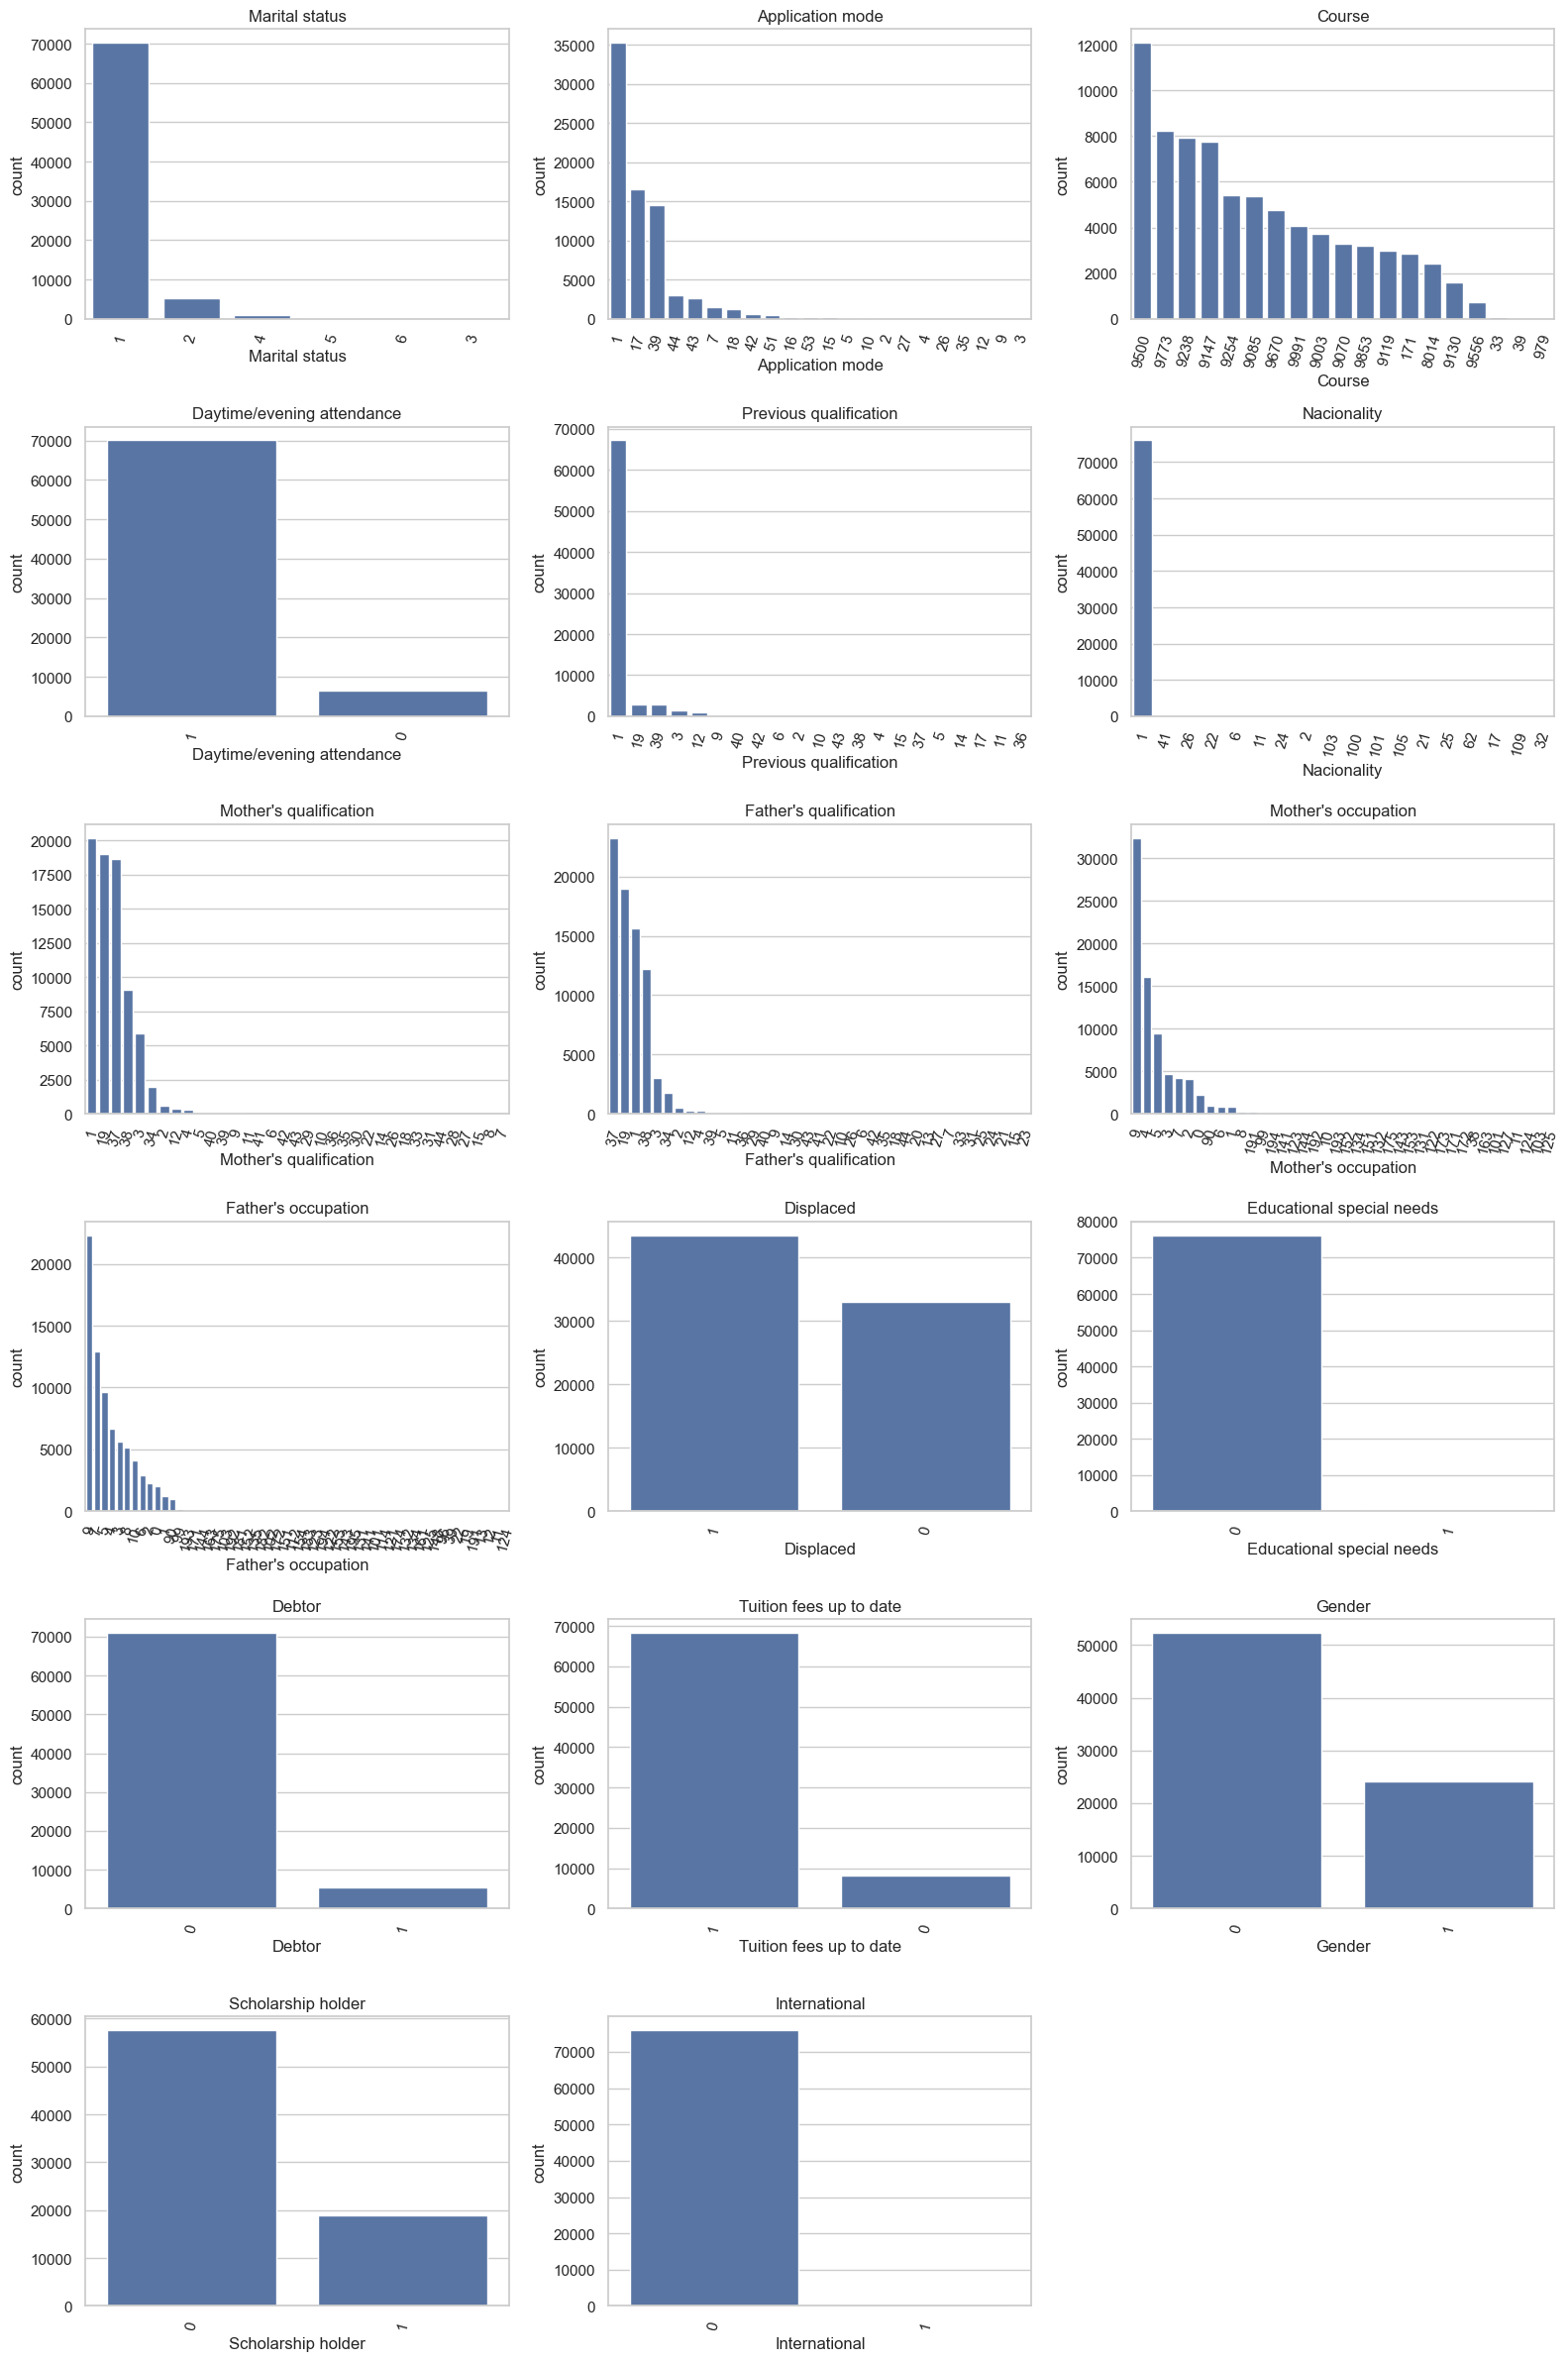

In [25]:
# 设置图形的风格
sns.set(style="whitegrid")

# 绘制直方图，查看每个分类变量的分布
plt.figure(figsize=(16, 24))  # 设置一个较大的图形尺寸以容纳所有的直方图

# 由于分类变量较多，我们可以采用多个子图（subplot）来展示
num_rows = len(categorical_variables.columns) // 3 + 1  # 计算需要多少行，每行放3个图

for i, column in enumerate(categorical_variables.columns, 1):
    plt.subplot(num_rows, 3, i)  # 创建子图
    sns.countplot(x=categorical_variables[column], order=categorical_variables[column].value_counts().index)
    plt.title(column)
    plt.xticks(rotation=75)  # 旋转x轴标签，以免重叠
    plt.tight_layout()

plt.show()

从直方图的结果来看：

- 绝大多数的学生的状态是single，其次是married和widower，其他状态基本接近于0
- Daytime/Evening Attendance：日间上课的学生数量远多于夜间上课的学生。
- Previous Qualification：Secondary的文凭的学生明显的高于了其他情况之下的学生
- Nationality:一种国籍（可能是当地国籍）占了绝大多数，其他国籍的学生数量相对较少；这点从international变量的分布中也可以看出来
- Displaced：绝大部分学生不属于流离失所者
- Displaced：绝大部分学生不属于流离失所者。
- Educational Special Needs：几乎所有学生都没有特殊教育需求
- Debtor, Tuition Fees Up to Date：大部分学生没有负债，学费也是按时支付的
- Scholarship Holder, International：大部分学生没有奖学金，大多数学生也不是国际学生
- Gender：性别分布中，男性略多于女性
- Scholarship Holder：直方图显示大多数学生没有获得奖学金。获得奖学金的学生相对较少，这可能与奖学金的可用性或资格条件有关，也与常识相符合

接着来查看一下Target变量的分布：

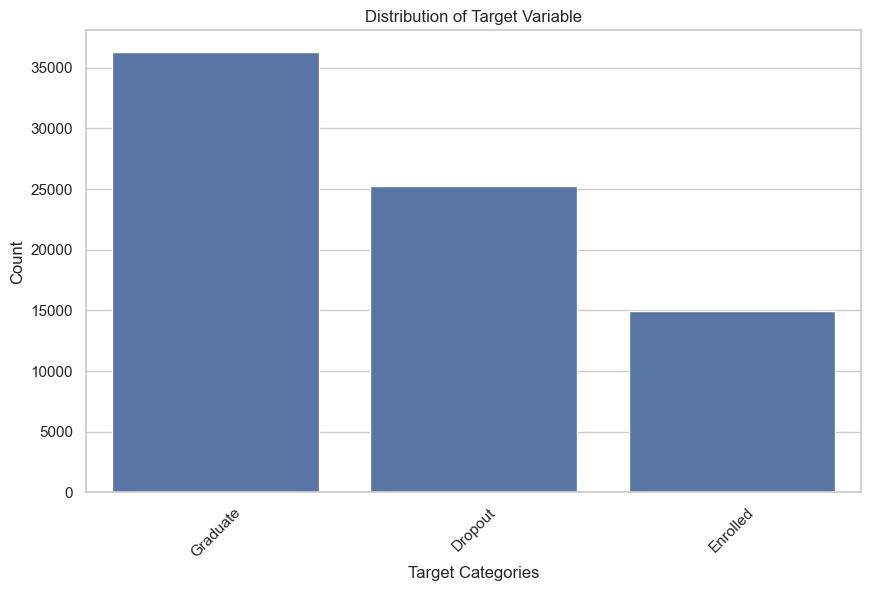

In [26]:
# 设置图形的风格
sns.set(style="whitegrid")

# 绘制直方图查看'Target'变量的分布
plt.figure(figsize=(10, 6))
sns.countplot(x='Target', data=train_data, order = train_data['Target'].value_counts().index)
plt.title('Distribution of Target Variable')
plt.xlabel('Target Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)  # 旋转x轴标签以提高可读性
plt.show()

数据显示，毕业生数量最多，这是一个积极的指标，表明该教育机构在支持学生完成学业方面可能表现良好。大多数学生能够成功完成他们的课程并获得毕业证书，这反映了学校的教育质量和学生的努力。

尽管如此，辍学学生的数量虽然明显少于毕业生，但仍占据了一个显著的比例。这表明仍有一部分学生因各种原因未能完成课程。这个现象值得进一步调查，以了解导致学生辍学的因素，并制定相应的支持策略。

在读学生的数量介于毕业生和辍学生之间。这个中等规模的在读学生群体可能包括不同年级和专业的学生。他们的存在表明教育机构持续吸引新生入学，维持着稳定的学生流动。同时，这也为学校提供了机会，通过适当的干预和支持，帮助这些在读学生最终成功毕业，而不是成为未来的辍学统计数据。

因为存在着不少分类变量，我们还可以查看分类变量中每个类别的分布情况：

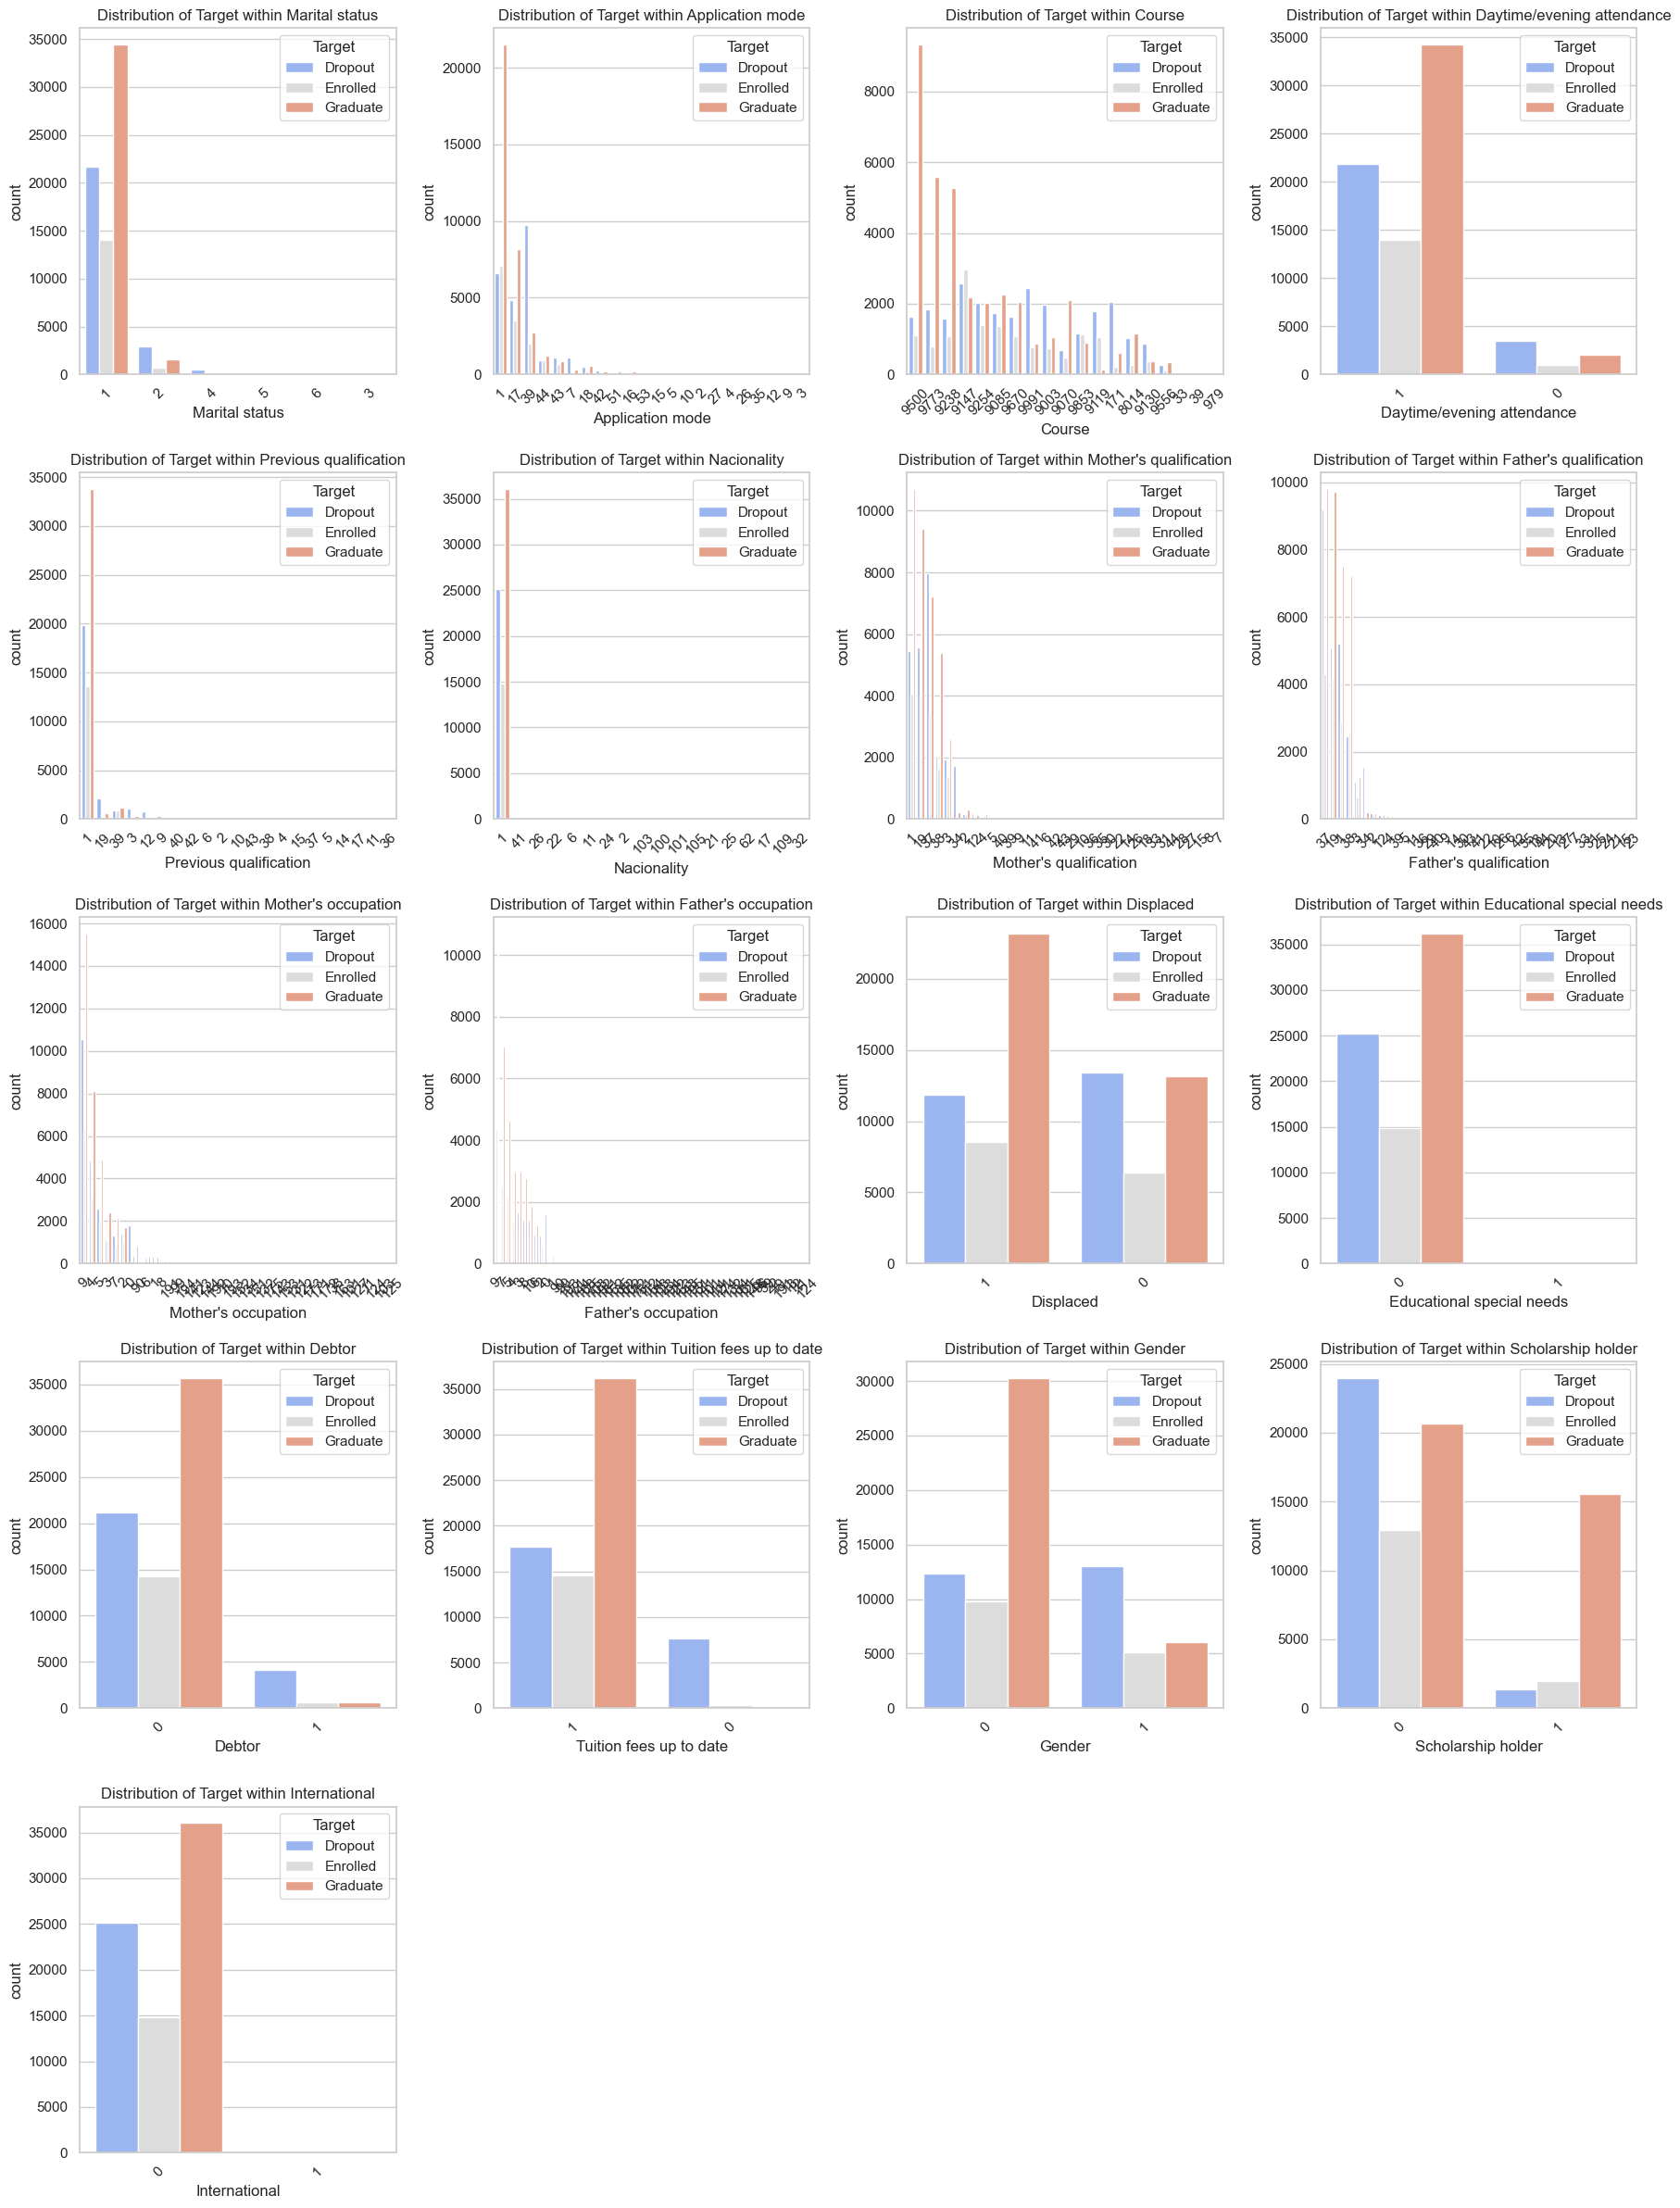

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置图形的风格
sns.set(style="whitegrid")

# 创建一个大的图形，足以展示多个条形图
plt.figure(figsize=(18, 24))

# 循环遍历每个分类变量并创建一个分组条形图
for i, var in enumerate(categorical_variables, 1):
    plt.subplot(5, 4, i)  # 调整网格大小以适应所有图表
    sns.countplot(x=var, hue='Target', data=train_data, palette='coolwarm', order=train_data[var].value_counts().index)
    plt.title(f'Distribution of Target within {var}')
    plt.xticks(rotation=45)  # 旋转标签以提高可读性
    plt.tight_layout()

plt.show()


日间上课的学生中，毕业生数量显著超过辍学和在读的学生，暗示日间课程可能提供了更充足的支持和资源。相比之下，夜间上课的学生辍学率较高，可能是因为他们面临更多的挑战，如工作和学习的平衡问题。

未被置换的学生中，毕业生的比例较高，而被置换的学生辍学率稍高，这表明流离失所可能对学业完成构成了额外障碍。

基本不存在或者不存在需要特殊教育的学生和国际生。

债务者中辍学率显著高于非债务者，毕业生数量也明显减少，强调了经济压力是学生学业成功的一个重要障碍。

按时支付学费的学生毕业率高，而未按时支付的学生辍学率较高，再次证实了经济因素在教育成就中的关键作用。

男性和女性学生的毕业率相当，但男性学生的辍学率略高，这可能反映了性别在教育路径选择和资源获取上的细微差异。

持有奖学金的学生中，毕业率明显高于非奖学金持有者，表明奖学金是支持学生完成学业的关键因素。

数据显示几乎没有国际学生参与，可能是因为学校的招生政策或课程设置主要面向本地学生，或者国际学生面临额外的挑战和障碍。

# 特征工程

首先是查看numerical variables之间的相关性：

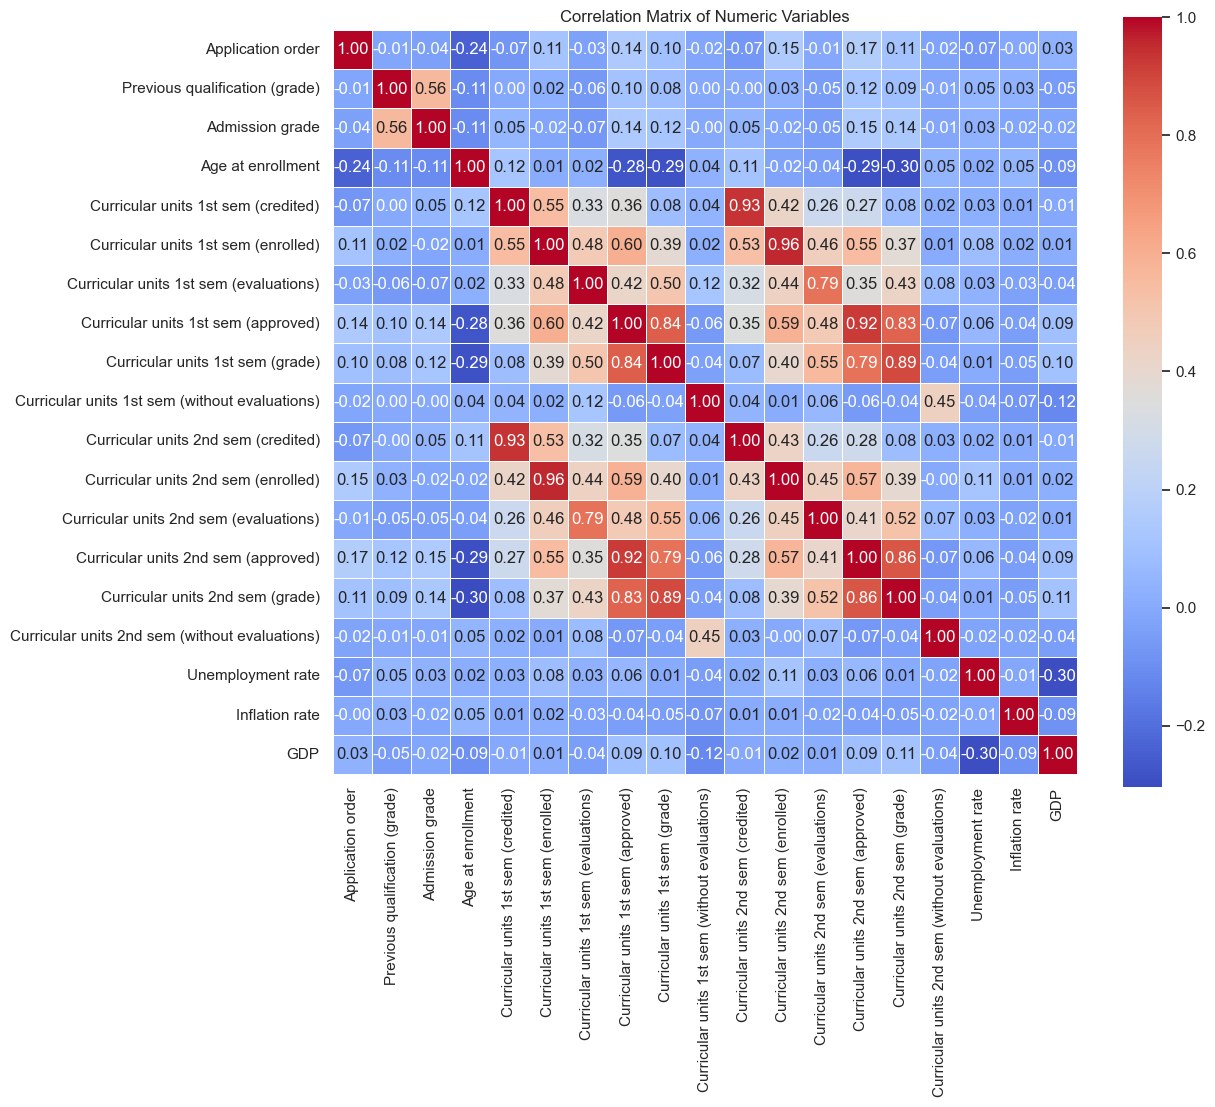

In [30]:
corr_matrix = numeric_variables.corr()

# 使用 seaborn 创建热图
plt.figure(figsize=(12, 10))  # 可以根据需要调整图形尺寸
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

In [32]:
# 获取上三角矩阵（不包括对角线）
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 堆叠成一个 Series
stacked = upper_tri.stack()

# 找出相关性大于等于 0.7 的对
high_corr = stacked[stacked >= 0.7]

# 输出结果
for (var1, var2), corr in high_corr.items():
    print(f"Variables '{var1}' and '{var2}' 's correlation coefficient value is:  {corr:.2f}")

Variables 'Curricular units 1st sem (credited)' and 'Curricular units 2nd sem (credited)' 's correlation coefficient value is:  0.93
Variables 'Curricular units 1st sem (enrolled)' and 'Curricular units 2nd sem (enrolled)' 's correlation coefficient value is:  0.96
Variables 'Curricular units 1st sem (evaluations)' and 'Curricular units 2nd sem (evaluations)' 's correlation coefficient value is:  0.79
Variables 'Curricular units 1st sem (approved)' and 'Curricular units 1st sem (grade)' 's correlation coefficient value is:  0.84
Variables 'Curricular units 1st sem (approved)' and 'Curricular units 2nd sem (approved)' 's correlation coefficient value is:  0.92
Variables 'Curricular units 1st sem (approved)' and 'Curricular units 2nd sem (grade)' 's correlation coefficient value is:  0.83
Variables 'Curricular units 1st sem (grade)' and 'Curricular units 2nd sem (approved)' 's correlation coefficient value is:  0.79
Variables 'Curricular units 1st sem (grade)' and 'Curricular units 2nd s

从提供的相关性分析结果中，我们可以看到几对变量之间存在着非常高的相关性。这些高度的相关性揭示了学生在不同学期之间在学业表现、课程注册、评估和成绩方面的一致性和持续性。以下是对这些结果的解释和它们可能的意义：

1. **课程注册量（第一学期与第二学期）**：
   - 相关系数为0.96，显示第一学期和第二学期中学生注册的课程数量之间的非常强的一致性。这表明大多数学生在整个学年中保持相似的课程负荷，可能受到课程结构和学期要求的影响。

2. **课程评估次数（第一学期与第二学期）**：
   - 相关系数为0.79，表明评估次数在连续学期间也相对稳定。这可能意味着课程的评估结构（如考试和作业的频率）在学年内保持一致。

3. **课程通过率与课程成绩（第一学期）**：
   - 相关系数为0.84，说明学生在课程中的表现（即成绩）与他们通过课程的能力（即课程通过率）高度相关。通常，成绩好的学生在课程中的通过率也高。

4. **课程通过率（第一学期与第二学期）**：
   - 相关系数为0.92，这是一个非常高的相关性，显示学生在第一学期的表现与第二学期在通过课程方面的表现密切相关。这可能反映了学生的学习习惯和努力程度在学年内的持续性。

5. **第一学期的课程通过率与第二学期的课程成绩**：
   - 相关系数为0.83，表明第一学期的课程通过率与第二学期的课程成绩密切相关，说明学生的学业表现具有连续性和可预测性。

6. **课程成绩与通过率（第二学期）**：
   - 相关系数为0.86，进一步强调了成绩与通过率之间的密切联系，指出学生在课程中获得高分通常也意味着他们能成功完成课程。

7. **课程成绩（第一学期与第二学期）**：
   - 相关系数为0.89，显示学生在学年内的学习成绩具有很高的一致性，这可能与他们的学习态度、资源可用性和教学质量有关。

从train_data中删除这些变量：

In [36]:
# 定义要删除的变量列表
variables_to_remove = [
    'Curricular units 2nd sem (enrolled)',   # 删除此变量因为与'Curricular units 1st sem (enrolled)'相关系数为0.96
    'Curricular units 2nd sem (evaluations)', # 删除此变量因为与'Curricular units 1st sem (evaluations)'相关系数为0.79
    'Curricular units 2nd sem (approved)',    # 删除此变量因为与'Curricular units 1st sem (approved)'相关系数为0.92
    'Curricular units 2nd sem (grade)',       # 删除此变量因为与'Curricular units 1st sem (grade)'相关系数为0.89
    'Curricular units 1st sem (enrolled)',    # 删除此变量因为与'Curricular units 1st sem (credited)'可能显示出高度相关（预期>0.9）
    'Curricular units 1st sem (approved)'     # 删除此变量因为与'Curricular units 1st sem (grade)'相关系数为0.84
]

# 删除这些变量
train_data = train_data.drop(columns=variables_to_remove)

In [37]:
# 查看一下
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 32 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   id                                              76518 non-null  int64   
 1   Marital status                                  76518 non-null  category
 2   Application mode                                76518 non-null  category
 3   Application order                               76518 non-null  int64   
 4   Course                                          76518 non-null  category
 5   Daytime/evening attendance                      76518 non-null  category
 6   Previous qualification                          76518 non-null  category
 7   Previous qualification (grade)                  76518 non-null  float64 
 8   Nacionality                                     76518 non-null  category
 9   Mother's qualification      

接着查看categorical variables之间的相关性，由于categorical variables中的变量都是分类变量，所以这里使用Cramér's V方法，该方法对于任何形式的分类变量（无论是有序还是无序）都很适合，并且能提供一个0到1之间的相关性度量，其中1表示完全相关，0表示无相关。

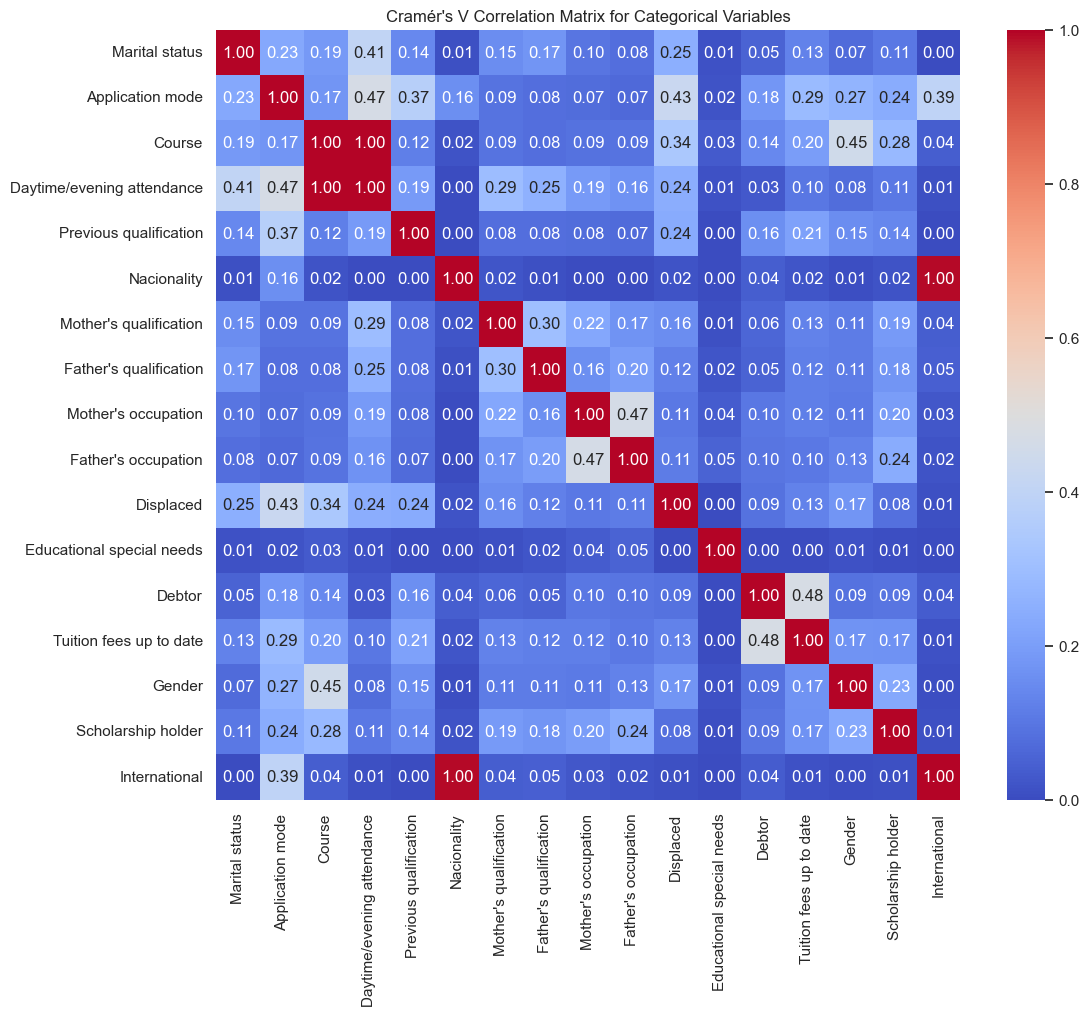

In [34]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# 假设 categorical_variables 是包含分类变量的DataFrame
cols = categorical_variables.columns
corr_matrix = pd.DataFrame(index=cols, columns=cols)

for col1 in cols:
    for col2 in cols:
        corr_matrix.loc[col1, col2] = cramers_v(categorical_variables[col1], categorical_variables[col2])

# 将相关系数矩阵的值转换为浮点数，以便绘图
corr_matrix = corr_matrix.astype(float)

# 使用 seaborn 绘制热图
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Cramér\'s V Correlation Matrix for Categorical Variables')
plt.show()

可以发现所有的分类变量之间的相关性都非常的低，最高也只有0.48，绝大多数都是低于了0.2，因此不需要删除任何的分类变量。

接着需要对数据集中的categorical variables进行独热编码，许多机器学习算法，特别是那些基于数学运算的算法（如线性回归、逻辑回归、支持向量机等），都预期输入数据为数值型。分类变量如果保留为标签（如字符串），这些算法无法直接处理。

In [39]:
# 首先，选择需要独热编码的列，即所有分类变量的列（排除 'Target' 列）
categorical_cols = train_data.select_dtypes(include=['category']).columns.tolist()
categorical_cols.remove('Target')  # 移除目标变量 'Target'

# 使用 pd.get_dummies() 对分类变量进行独热编码
train_encoded = pd.get_dummies(train_data, columns=categorical_cols, drop_first=True)

In [45]:
# 输出结果查看
print(train_encoded.columns)

Index(['id', 'Application order', 'Previous qualification (grade)',
       'Admission grade', 'Age at enrollment',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       ...
       'Father's occupation_193', 'Father's occupation_194',
       'Father's occupation_195', 'Displaced_1', 'Educational special needs_1',
       'Debtor_1', 'Tuition fees up to date_1', 'Gender_1',
       'Scholarship holder_1', 'International_1'],
      dtype='object', length=270)


至此，已经完成了train_data的数据集的探索和特征工程，接下来就是使用数据集来训练分类模型，并且进行评估。

# 分类模型

## 数据集分割

通常来讲，数据集会被分为三个子数据集：
- train data：用来训练模型
- valid data：用来评估模型和调整参数
- test data：用模型来预测训练中没有出现过的数据集，对最终模型的最终表型进行评估

test data中的数据在训练模型和调整参数的过程中不能够被使用，否则对模型的泛化能力的评估无法被采纳。

但是在这个比三种，数据集已经被分为了train data和test data，并且还有sample data，所以这里只需要将导入的train data分割为train data数据集分割为train data和test data就可以了，这里的test data其实就是valid data。

In [49]:
from sklearn.model_selection import train_test_split

# 假设 train_data 是你的DataFrame，且 'Target' 是目标变量列

# 分离特征和目标变量
X = train_data.drop(['Target', 'id'], axis=1)  # id只是index，不存在着对Target的预测能力，drop可以避免干扰
y = train_encoded['Target']  # 目标集：只包含 'Target' 列

# 分割数据集为训练集和测试集
# test_size=0.20 表示20%的数据用于测试
# random_state 设置一个随机种子以确保每次分割一致，便于复现结果
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=43)

# 输出分割后的数据集大小确认
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (61214, 30)
Testing set size: (15304, 30)


## 逻辑回归模型

首先训练一个逻辑回归模型：

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 初始化逻辑回归模型
logreg = LogisticRegression(max_iter=1000)  # 增加迭代次数以确保收敛

# 训练模型
logreg.fit(X_train, y_train)

# 在训练集上进行预测
y_train_pred = logreg.predict(X_train)

# 评估模型表现
print("Accuracy on Training Set:", accuracy_score(y_train, y_train_pred))
print("Confusion Matrix on Training Set:\n", confusion_matrix(y_train, y_train_pred))
print("Classification Report on Training Set:\n", classification_report(y_train, y_train_pred))

C:\Users\wangj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on Training Set: 0.7206684745319698
Confusion Matrix on Training Set:
 [[14463  1851  3929]
 [ 2135  2989  6805]
 [ 1269  1110 26663]]
Classification Report on Training Set:
               precision    recall  f1-score   support

     Dropout       0.81      0.71      0.76     20243
    Enrolled       0.50      0.25      0.33     11929
    Graduate       0.71      0.92      0.80     29042

    accuracy                           0.72     61214
   macro avg       0.67      0.63      0.63     61214
weighted avg       0.70      0.72      0.70     61214



型在训练集上的总体准确度为72.07%，这表示大约72%的时间模型能正确预测学生的状态（辍学、在读、毕业）。这是一个中等水平的表现，表明模型在识别不同类别方面具有一定的有效性，但仍有改进空间。

混淆矩阵提供了每个类别预测正确与错误的详细视图。对于辍学类别，20,243个样本中有14,463个被正确分类，1,851个错误分类为在读，3,929个错误分类为毕业。在读类别中，11,929个样本中仅有2,989个被正确分类，2,135个错误分类为辍学，6,805个错误分类为毕业。毕业类别表现较好，29,042个样本中有26,663个被正确分类，1,269个错误分类为辍学，1,110个错误分类为在读。

分类报告中的精确率、召回率和F1得分进一步揭示了模型在各类别上的表现。辍学类别的精确率为81%，召回率为71%，F1得分为76%，表明模型在识别辍学学生方面表现良好。然而，在读类别的表现较差，精确率为50%，召回率仅为25%，F1得分为33%，这意味着模型在识别在读学生方面存在显著问题。毕业类别的表现最为出色，精确率为71%，召回率高达92%，F1得分为80%，显示模型在预测毕业学生方面相对准确和一致。

总的来说，这些结果表明，尽管模型在整体上达到了72%的准确度，但在不同的类别上表现差异很大。特别是对于在读学生的识别，模型的精确率和召回率都相对较低，可能需要进一步调查数据不平衡或考虑使用不同的特征或模型来改进这一点。

接着使用X_test和y_test来评估模型的性能，并且判断泛化性：

In [51]:
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 使用训练好的逻辑回归模型在测试集上进行预测
y_test_pred = logreg.predict(X_test)

# 评估模型表现
print("Accuracy on Test Set:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix on Test Set:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report on Test Set:\n", classification_report(y_test, y_test_pred))

Accuracy on Test Set: 0.7190277051751176
Confusion Matrix on Test Set:
 [[3611  450  992]
 [ 532  734 1745]
 [ 314  267 6659]]
Classification Report on Test Set:
               precision    recall  f1-score   support

     Dropout       0.81      0.71      0.76      5053
    Enrolled       0.51      0.24      0.33      3011
    Graduate       0.71      0.92      0.80      7240

    accuracy                           0.72     15304
   macro avg       0.67      0.63      0.63     15304
weighted avg       0.70      0.72      0.69     15304



这些结果表明模型在未见数据上具有相当的稳定性和一致性，但仍存在一些类别预测表现不均衡的问题，尤其是在预测在读学生方面。

## 决策树模型

使用决策树模型时，通常不需要对分类变量进行独热编码。这是因为决策树算法如CART（Classification and Regression Trees），以及基于决策树的算法如随机森林、梯度提升树（Gradient Boosting Machines）等，都能够直接处理分类变量。

In [52]:
# 所以直接使用非独热编码的数据集

# 删除 'Target' 列和 'id' 列来准备特征集 X
X = train_data.drop(['Target', 'id'], axis=1)
y = train_data['Target']  # 目标集：只包含 'Target' 列

# 分割数据集为训练集和测试集
# test_size=0.20 表示20%的数据用于测试
# random_state 设置一个随机种子以确保每次分割一致，便于复现结果
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# 输出分割后的数据集大小确认
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (61214, 30)
Testing set size: (15304, 30)


接着开始训练决策树：

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [59]:
# 初始化决策树分类器
dt_classifier = DecisionTreeClassifier(random_state=42)

# 训练模型
dt_classifier.fit(X_train, y_train)

# 在训练集上进行预测
y_train_pred = dt_classifier.predict(X_train)

# 评估模型在训练集上的表现
print("Accuracy on Training Set:", accuracy_score(y_train, y_train_pred))
print("Confusion Matrix on Training Set:\n", confusion_matrix(y_train, y_train_pred))
print("Classification Report on Training Set:\n", classification_report(y_train, y_train_pred))

Accuracy on Training Set: 0.9999673277354854
Confusion Matrix on Training Set:
 [[20268     0     0]
 [    0 11923     0]
 [    1     1 29021]]
Classification Report on Training Set:
               precision    recall  f1-score   support

     Dropout       1.00      1.00      1.00     20268
    Enrolled       1.00      1.00      1.00     11923
    Graduate       1.00      1.00      1.00     29023

    accuracy                           1.00     61214
   macro avg       1.00      1.00      1.00     61214
weighted avg       1.00      1.00      1.00     61214



根据提供的结果，我们可以对决策树模型在训练集上的表现进行详细分析。模型在训练集上展现出了几乎完美的准确度，达到了惊人的99.9967%。这意味着模型几乎无误地预测了训练集中的所有样本，表现出极高的拟合程度。

混淆矩阵进一步证实了模型的出色表现。在辍学和在读类别中，所有样本都被准确分类，分别为20,268和11,923个。对于毕业类别，29,023个样本中只有2个被错误分类，其余29,021个都被正确识别。这种近乎完美的分类结果在实际应用中是非常罕见的。

分类报告中的各项指标同样反映了模型的卓越性能。所有类别的精确率、召回率和F1得分均达到了1.00，这表示模型在预测的可靠性、识别真实样本的能力以及整体平衡性上都达到了理论上的最佳水平。这种完美的表现进一步强调了模型与训练数据之间的紧密拟合程度。

然而，如此出色的训练集表现也引发了对过拟合问题的严重关切。模型几乎完美地捕捉了训练数据中的所有模式，包括可能存在的噪音和细微特征。这种情况通常意味着决策树模型已经过度拟合了训练数据。虽然这导致了在训练集上的卓越表现，但很可能会在实际应用或未见过的数据上表现较差。为了解决这个问题，建议采取一些措施来降低模型的复杂度，如设置最大深度、增加最小样本分裂数等，以提高模型的泛化能力。同时，使用交叉验证和独立的测试集来评估模型的真实性能也是非常必要的。

In [60]:
# 在测试集上进行预测
y_test_pred = dt_classifier.predict(X_test)

# 评估模型在测试集上的表现
print("Accuracy on Test Set:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix on Test Set:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report on Test Set:\n", classification_report(y_test, y_test_pred))

Accuracy on Test Set: 0.6889048614741244
Confusion Matrix on Test Set:
 [[3779  710  539]
 [ 739 1239 1039]
 [ 602 1132 5525]]
Classification Report on Test Set:
               precision    recall  f1-score   support

     Dropout       0.74      0.75      0.74      5028
    Enrolled       0.40      0.41      0.41      3017
    Graduate       0.78      0.76      0.77      7259

    accuracy                           0.69     15304
   macro avg       0.64      0.64      0.64     15304
weighted avg       0.69      0.69      0.69     15304



模型在Test Set上的表现可以确定，这个模型出现了过拟合的情况。

In [61]:
params = dt_classifier.get_params()

# 打印参数
for param, value in params.items():
    print(f"{param}: {value}")

ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
monotonic_cst: None
random_state: 42
splitter: best


开始尝试各种参数来找到一个最佳的结果：

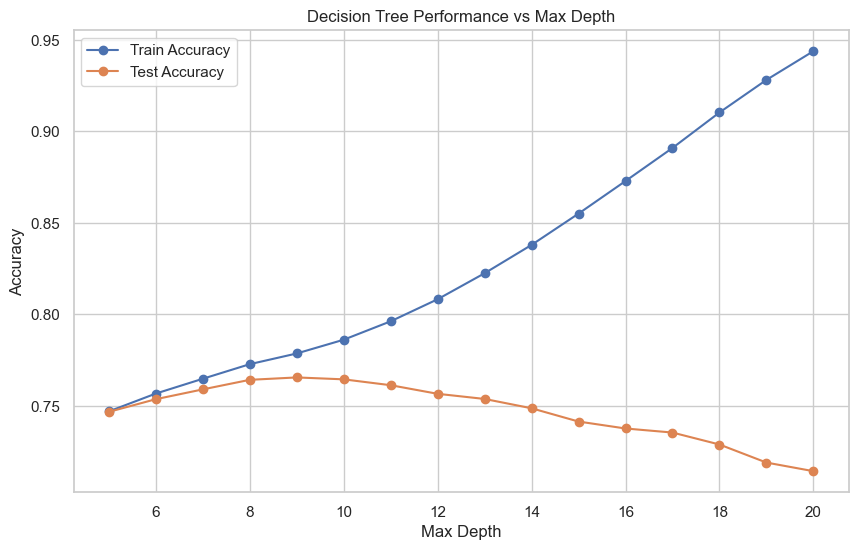

Best max_depth based on test accuracy: 9


In [63]:
# 定义max_depth的范围
max_depths = range(5, 21)

# 存储结果的列表
train_accuracies = []
test_accuracies = []

# 遍历不同的max_depth值
for max_depth in max_depths:
    # 初始化和训练模型
    dt_classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt_classifier.fit(X_train, y_train)
    
    # 在训练集上进行预测并计算准确度
    y_train_pred = dt_classifier.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)
    
    # 在测试集上进行预测并计算准确度
    y_test_pred = dt_classifier.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(max_depths, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Performance vs Max Depth')
plt.legend()
plt.grid(True)
plt.show()

# 打印最佳max_depth值
best_max_depth = max_depths[test_accuracies.index(max(test_accuracies))]
print(f"Best max_depth based on test accuracy: {best_max_depth}")

In [64]:
# 定义参数网格
param_grid = {
    'min_samples_split': [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
}

# 初始化决策树分类器
dt_classifier = DecisionTreeClassifier(max_depth=9, random_state=42)

# 使用 GridSearchCV 进行超参数调优
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# 训练模型
grid_search.fit(X_train, y_train)

# 输出最佳参数和对应的得分
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)

# 在训练集和测试集上评估最佳模型
best_dt_classifier = grid_search.best_estimator_

# 在训练集上进行预测
y_train_pred = best_dt_classifier.predict(X_train)
print("Accuracy on Training Set:", accuracy_score(y_train, y_train_pred))
print("Confusion Matrix on Training Set:\n", confusion_matrix(y_train, y_train_pred))
print("Classification Report on Training Set:\n", classification_report(y_train, y_train_pred))

# 在测试集上进行预测
y_test_pred = best_dt_classifier.predict(X_test)
print("Accuracy on Test Set:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix on Test Set:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report on Test Set:\n", classification_report(y_test, y_test_pred))

Best parameters found:  {'min_samples_split': 35}
Best cross-validation accuracy:  0.7621622152501001
Accuracy on Training Set: 0.776570719116542
Confusion Matrix on Training Set:
 [[15129  2967  2172]
 [ 1079  6692  4152]
 [  507  2800 25716]]
Classification Report on Training Set:
               precision    recall  f1-score   support

     Dropout       0.91      0.75      0.82     20268
    Enrolled       0.54      0.56      0.55     11923
    Graduate       0.80      0.89      0.84     29023

    accuracy                           0.78     61214
   macro avg       0.75      0.73      0.74     61214
weighted avg       0.78      0.78      0.78     61214

Accuracy on Test Set: 0.7651594354417146
Confusion Matrix on Test Set:
 [[3719  780  529]
 [ 334 1597 1086]
 [ 143  722 6394]]
Classification Report on Test Set:
               precision    recall  f1-score   support

     Dropout       0.89      0.74      0.81      5028
    Enrolled       0.52      0.53      0.52      3017
    Grad

模型在测试集上的准确度为 76.52%，与训练集上的 77.66% 相比非常接近，表明模型有良好的泛化能力，没有出现明显的过拟合问题。

对于 Dropout 和 Graduate 类别，模型表现较好，精确率和召回率均较高。

对于 Enrolled 类别，虽然表现有所改善，但精确率和召回率仍然较低，说明模型在区分在读学生方面仍有改进空间。

In [65]:
# 定义参数网格
param_grid = {
    'min_samples_leaf': [1, 5, 10, 20],
    'ccp_alpha': [0.0, 0.01, 0.05, 0.1]
}

# 使用 GridSearchCV 进行超参数调优
dt_classifier = DecisionTreeClassifier(max_depth=9, min_samples_split=35, random_state=42)
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# 训练模型
grid_search.fit(X_train, y_train)

# 输出最佳参数和对应的得分
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)

# 在训练集和测试集上评估最佳模型
best_dt_classifier = grid_search.best_estimator_

# 在训练集上进行预测
y_train_pred = best_dt_classifier.predict(X_train)
print("Accuracy on Training Set:", accuracy_score(y_train, y_train_pred))
print("Confusion Matrix on Training Set:\n", confusion_matrix(y_train, y_train_pred))
print("Classification Report on Training Set:\n", classification_report(y_train, y_train_pred))

# 在测试集上进行预测
y_test_pred = best_dt_classifier.predict(X_test)
print("Accuracy on Test Set:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix on Test Set:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report on Test Set:\n", classification_report(y_test, y_test_pred))

Best parameters found:  {'ccp_alpha': 0.0, 'min_samples_leaf': 20}
Best cross-validation accuracy:  0.7625215936134426
Accuracy on Training Set: 0.7751494756101546
Confusion Matrix on Training Set:
 [[15191  2872  2205]
 [ 1208  6553  4162]
 [  524  2793 25706]]
Classification Report on Training Set:
               precision    recall  f1-score   support

     Dropout       0.90      0.75      0.82     20268
    Enrolled       0.54      0.55      0.54     11923
    Graduate       0.80      0.89      0.84     29023

    accuracy                           0.78     61214
   macro avg       0.75      0.73      0.73     61214
weighted avg       0.78      0.78      0.78     61214

Accuracy on Test Set: 0.7651594354417146
Confusion Matrix on Test Set:
 [[3726  759  543]
 [ 352 1587 1078]
 [ 138  724 6397]]
Classification Report on Test Set:
               precision    recall  f1-score   support

     Dropout       0.88      0.74      0.81      5028
    Enrolled       0.52      0.53      0.52 

模型在训练集和测试集上的表现相当一致，说明模型有良好的泛化能力，没有明显的过拟合问题。

基于这三个最佳参数，训练一个best_tree模型，输出性能：

In [66]:
# 使用最佳参数初始化决策树分类器
best_tree = DecisionTreeClassifier(max_depth=9, min_samples_split=35, min_samples_leaf=20, ccp_alpha=0.0, random_state=42)

# 训练模型
best_tree.fit(X_train, y_train)

# 在训练集上进行预测
y_train_pred = best_tree.predict(X_train)
print("Accuracy on Training Set:", accuracy_score(y_train, y_train_pred))
print("Confusion Matrix on Training Set:\n", confusion_matrix(y_train, y_train_pred))
print("Classification Report on Training Set:\n", classification_report(y_train, y_train_pred))

# 在测试集上进行预测
y_test_pred = best_tree.predict(X_test)
print("Accuracy on Test Set:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix on Test Set:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report on Test Set:\n", classification_report(y_test, y_test_pred))

Accuracy on Training Set: 0.7751494756101546
Confusion Matrix on Training Set:
 [[15191  2872  2205]
 [ 1208  6553  4162]
 [  524  2793 25706]]
Classification Report on Training Set:
               precision    recall  f1-score   support

     Dropout       0.90      0.75      0.82     20268
    Enrolled       0.54      0.55      0.54     11923
    Graduate       0.80      0.89      0.84     29023

    accuracy                           0.78     61214
   macro avg       0.75      0.73      0.73     61214
weighted avg       0.78      0.78      0.78     61214

Accuracy on Test Set: 0.7651594354417146
Confusion Matrix on Test Set:
 [[3726  759  543]
 [ 352 1587 1078]
 [ 138  724 6397]]
Classification Report on Test Set:
               precision    recall  f1-score   support

     Dropout       0.88      0.74      0.81      5028
    Enrolled       0.52      0.53      0.52      3017
    Graduate       0.80      0.88      0.84      7259

    accuracy                           0.77     15304


使用最佳参数 (`max_depth=9`, `min_samples_split=35`, `min_samples_leaf=20`, `ccp_alpha=0.0`) 训练的决策树模型在训练集和测试集上的表现如下。训练集上的准确度为 77.51%，测试集上的准确度为 76.52%。这表明模型在两个数据集上的表现非常接近，具有良好的泛化能力，未出现显著的过拟合现象。

在训练集上，模型对于`Dropout`类别的精确率为0.90，召回率为0.75，F1得分为0.82；对于`Enrolled`类别的精确率为0.54，召回率为0.55，F1得分为0.54；对于`Graduate`类别的精确率为0.80，召回率为0.89，F1得分为0.84。混淆矩阵显示出模型在区分各类别时存在一些混淆，尤其是`Enrolled`类别，这与其较低的精确率和召回率一致。

在测试集上，模型对于`Dropout`类别的精确率为0.88，召回率为0.74，F1得分为0.81；对于`Enrolled`类别的精确率为0.52，召回率为0.53，F1得分为0.52；对于`Graduate`类别的精确率为0.80，召回率为0.88，F1得分为0.84。尽管`Enrolled`类别的表现较其他类别略低，但总体上模型在各类别上的表现相对一致。通过进一步调整参数和处理类别不平衡问题，可能会进一步改善模型的性能。总体来看，这个模型展示了良好的分类能力和泛化性能，特别是在区分`Dropout`和`Graduate`类别时表现优异。

## 随机森林

接着可以尝试随机森林模型：

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [72]:
# 将训练集划分为训练子集和验证子集
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 定义参数网格
param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'class_weight': [None, 'balanced']
}

# 初始化随机森林分类器
rf_classifier = RandomForestClassifier(random_state=42)

# 使用 GridSearchCV 进行超参数调优
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# 在训练子集上训练模型
grid_search.fit(X_train_sub, y_train_sub)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20],
                         'n_estimators': [100, 150, 200, 250, 300]},
             scoring='accuracy')

In [73]:
# 输出最佳参数和对应的得分
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)

# 在验证集上评估最佳模型
best_rf_classifier = grid_search.best_estimator_
y_val_pred = best_rf_classifier.predict(X_val)
print("Accuracy on Validation Set:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix on Validation Set:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report on Validation Set:\n", classification_report(y_val, y_val_pred))

# 使用最佳参数在整个训练集上训练最终模型
best_rf_classifier_final = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_rf_classifier_final.fit(X_train, y_train)

# 在训练集上进行预测
y_train_pred = best_rf_classifier_final.predict(X_train)
print("Accuracy on Training Set:", accuracy_score(y_train, y_train_pred))
print("Confusion Matrix on Training Set:\n", confusion_matrix(y_train, y_train_pred))
print("Classification Report on Training Set:\n", classification_report(y_train, y_train_pred))

# 在测试集上进行预测
y_test_pred = best_rf_classifier_final.predict(X_test)
print("Accuracy on Test Set:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix on Test Set:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report on Test Set:\n", classification_report(y_test, y_test_pred))

Best parameters found:  {'class_weight': None, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 250}
Best cross-validation accuracy:  0.7814215973088503
Accuracy on Validation Set: 0.7853467287429552
Confusion Matrix on Validation Set:
 [[3212  437  467]
 [ 341 1196  826]
 [ 163  394 5207]]
Classification Report on Validation Set:
               precision    recall  f1-score   support

     Dropout       0.86      0.78      0.82      4116
    Enrolled       0.59      0.51      0.54      2363
    Graduate       0.80      0.90      0.85      5764

    accuracy                           0.79     12243
   macro avg       0.75      0.73      0.74     12243
weighted avg       0.78      0.79      0.78     12243

Accuracy on Training Set: 0.9175515404972718
Confusion Matrix on Training Set:
 [[18467   554  1247]
 [  638  9364  1921]
 [  305   382 28336]]
Classification Report on Training Set:
               precision    recall  f1-score   support

     Dropout  

从最新的结果可以看出，通过调整参数后的随机森林模型在训练集、验证集和测试集上表现如下：

**训练集上的表现**
- **准确度（Accuracy）**: 训练集上的准确度为 91.75%，表明模型在训练数据上表现非常好。
- **混淆矩阵（Confusion Matrix）**:
  - **Dropout**: 20,268个样本中18,467个正确分类，554个错误分类为Enrolled，1,247个错误分类为Graduate。
  - **Enrolled**: 11,923个样本中9,364个正确分类，638个错误分类为Dropout，1,921个错误分类为Graduate。
  - **Graduate**: 29,023个样本中28,336个正确分类，305个错误分类为Dropout，382个错误分类为Enrolled。
- **分类报告（Classification Report）**:
  - **Dropout**: 精确率为0.95，召回率为0.91，F1得分为0.93。
  - **Enrolled**: 精确率为0.91，召回率为0.79，F1得分为0.84。
  - **Graduate**: 精确率为0.90，召回率为0.98，F1得分为0.94。

**验证集上的表现**
- **准确度（Accuracy）**: 验证集上的准确度为 78.53%，表明模型在未见数据上的泛化能力较好。
- **混淆矩阵（Confusion Matrix）**:
  - **Dropout**: 4,116个样本中3,212个正确分类，437个错误分类为Enrolled，467个错误分类为Graduate。
  - **Enrolled**: 2,363个样本中1,196个正确分类，341个错误分类为Dropout，826个错误分类为Graduate。
  - **Graduate**: 5,764个样本中5,207个正确分类，163个错误分类为Dropout，394个错误分类为Enrolled。
- **分类报告（Classification Report）**:
  - **Dropout**: 精确率为0.86，召回率为0.78，F1得分为0.82。
  - **Enrolled**: 精确率为0.59，召回率为0.51，F1得分为0.54。
  - **Graduate**: 精确率为0.80，召回率为0.90，F1得分为0.85。

**测试集上的表现**
- **准确度（Accuracy）**: 测试集上的准确度为 78.20%，与验证集的准确度相近，表明模型有较好的泛化能力。
- **混淆矩阵（Confusion Matrix）**:
  - **Dropout**: 5,028个样本中3,952个正确分类，559个错误分类为Enrolled，517个错误分类为Graduate。
  - **Enrolled**: 3,017个样本中1,452个正确分类，418个错误分类为Dropout，1,147个错误分类为Graduate。
  - **Graduate**: 7,259个样本中6,563个正确分类，193个错误分类为Dropout，503个错误分类为Enrolled。
- **分类报告（Classification Report）**:
  - **Dropout**: 精确率为0.87，召回率为0.79，F1得分为0.82。
  - **Enrolled**: 精确率为0.58，召回率为0.48，F1得分为0.53。
  - **Graduate**: 精确率为0.80，召回率为0.90，F1得分为0.85。

存在着轻微的过拟合的可能性。